# 第 8 章 使用 SVM 完成乳腺癌检测

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

载入数据，有 40 个特征。

In [0]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [3]:
np.bincount(y)

array([212, 357])

In [4]:
X.shape

(569, 30)

In [7]:
print('no. positive: {0}; no. negative: {1}.'.format(y[y == 1].shape[0], y[y == 0].shape[0]))

no. positive: 357; no. negative: 212.


分割训练数据集和测试数据集。

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=666)

In [9]:
from sklearn.svm import SVC

clf = SVC(C=1.0, kernel='rbf', gamma=0.1)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}.'.format(train_score, test_score))

train score: 1.0; test score: 0.5964912280701754.


数据集很少，使用高斯核函数这一类复杂的核函数容易造成过拟合。

## 绘制学习曲线

In [0]:
# 将交叉验证的结果可视化
# 根据交叉验证的结果绘制参数的曲线图
# 注意：这里不是学习曲线，跟训练样本的数据多少是没有关系的

def plot_param_curve(plt, train_sizes, cv_results, xlabel):
    # 训练数据集的平均值和标准差
    train_scores_mean = cv_results['mean_train_score']
    train_scores_std = cv_results['std_train_score']
    # 测试数据集的平均值和标准差
    test_scores_mean = cv_results['mean_test_score']
    test_scores_std = cv_results['std_test_score']
    plt.title('parameters turning')
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel('score')

    # 绘制一个阴影区域
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    # 绘制一个阴影区域
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, '.--', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, '.-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [11]:
from sklearn.model_selection import GridSearchCV

gammas = np.linspace(0, 0.0003, 30)

param_grid = {'gamma': gammas}
# 5 折交叉验证
clf = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, return_train_score=True)
clf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': array([0.00000e+00, 1.03448e-05, 2.06897e-05, 3.10345e-05, 4.13793e-05,
       5.17241e-05, 6.20690e-05, 7.24138e-05, 8.27586e-05, 9.31034e-05,
       1.03448e-04, 1.13793e-04, 1.24138e-04, 1.34483e-04, 1.44828e-04,
       1.55172e-04, 1.65517e-04, 1.75862e-04, 1.86207e-04, 1.96552e-04,
       2.06897e-04, 2.17241e-04, 2.27586e-04, 2.37931e-04, 2.48276e-04,
       2.58621e-04, 2.68966e-04, 2.79310e-04, 2.89655e-04, 3.00000e-04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [12]:
print("best param: {0}\nbest score: {1}".format(clf.best_params_, clf.best_score_))

best param: {'gamma': 0.00011379310344827585}
best score: 0.9367311072056239


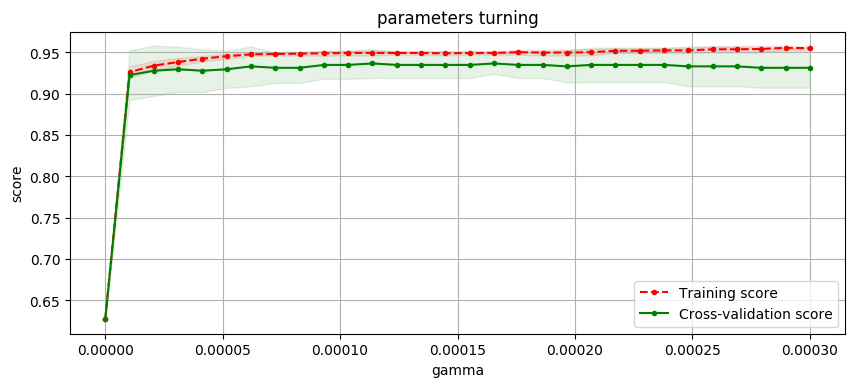

In [14]:
plt.figure(figsize=(10, 4), dpi=100)
plot_param_curve(plt, gammas, clf.cv_results_, xlabel='gamma')
plt.show()

In [0]:
from sklearn.model_selection import learning_curve


def plot_learning_curve(plt, estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

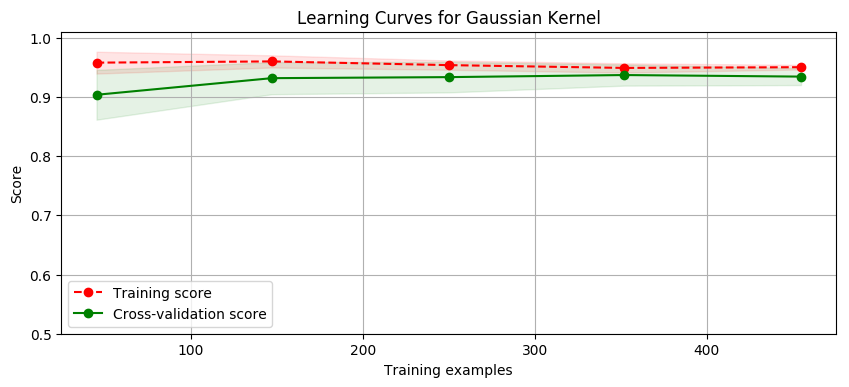

In [18]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = 'Learning Curves for Gaussian Kernel'


plt.figure(figsize=(10, 4), dpi=100)
plot_learning_curve(plt, SVC(C=1.0, kernel='rbf', gamma=0.00011379310344827585),
                    title, X, y, ylim=(0.5, 1.01), cv=cv)
plt.show()

绘制出学习曲线后，可以看出，交叉验证之后的模型有效抑制了过拟合。

之前参数 `gamma=0.01` 明显过拟合了。

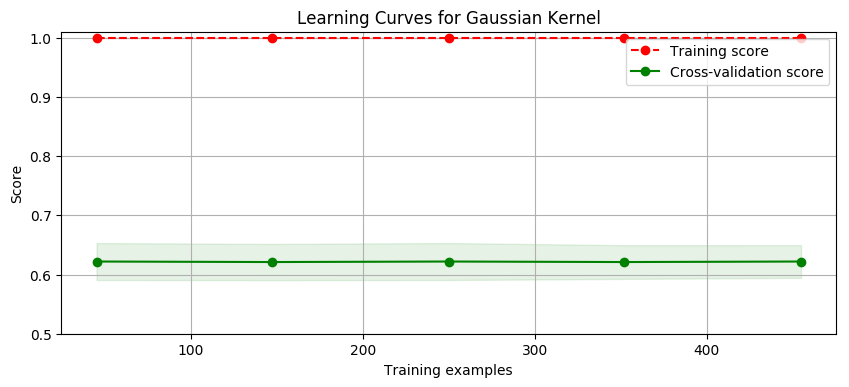

In [20]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = 'Learning Curves for Gaussian Kernel'

plt.figure(figsize=(10, 4), dpi=100)
plot_learning_curve(plt, SVC(C=1.0, kernel='rbf', gamma=0.01),
                    title, X, y, ylim=(0.5, 1.01), cv=cv)
plt.show()

## 多项式核函数

核函数：使用二阶多项式。

In [21]:
from sklearn.svm import SVC

clf = SVC(C=1.0, kernel='poly', degree=2)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}.'.format(train_score, test_score))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


train score: 0.9846153846153847; test score: 0.9649122807017544


执行下面这个单元比较耗时，我是在 google 的云端硬盘上执行完成的。

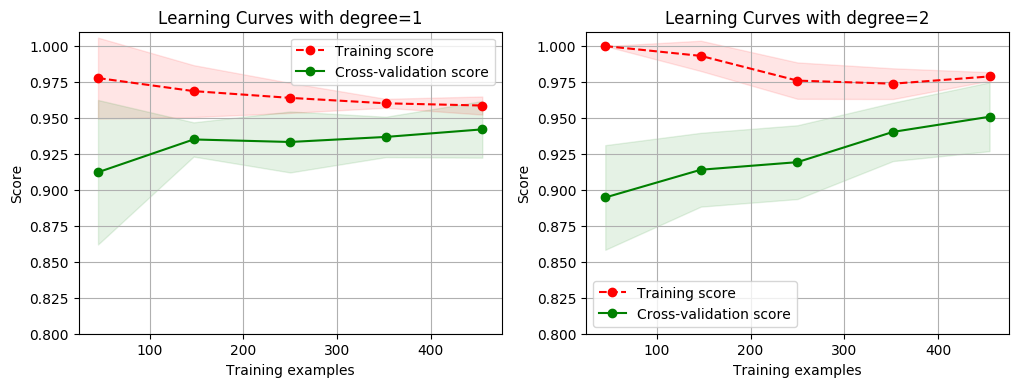

In [22]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
title = 'Learning Curves with degree={0}'
degrees = [1, 2]

plt.figure(figsize=(12, 4), dpi=100)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i + 1)
    plot_learning_curve(plt, SVC(C=1.0, kernel='poly', degree=degrees[i]), title.format(degrees[i]), X, y, ylim=(0.8, 1.01), cv=cv, n_jobs=4)

plt.show()

## 多项式 LinearSVC

In [23]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

def create_model(degree=2, **kwarg):
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    scaler = MinMaxScaler()
    linear_svc = LinearSVC(**kwarg)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("scaler", scaler),
                         ("linear_svc", linear_svc)])
    return pipeline


clf = create_model(penalty='l1', dual=False)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

train score: 0.9868131868131869; test score: 0.9649122807017544


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


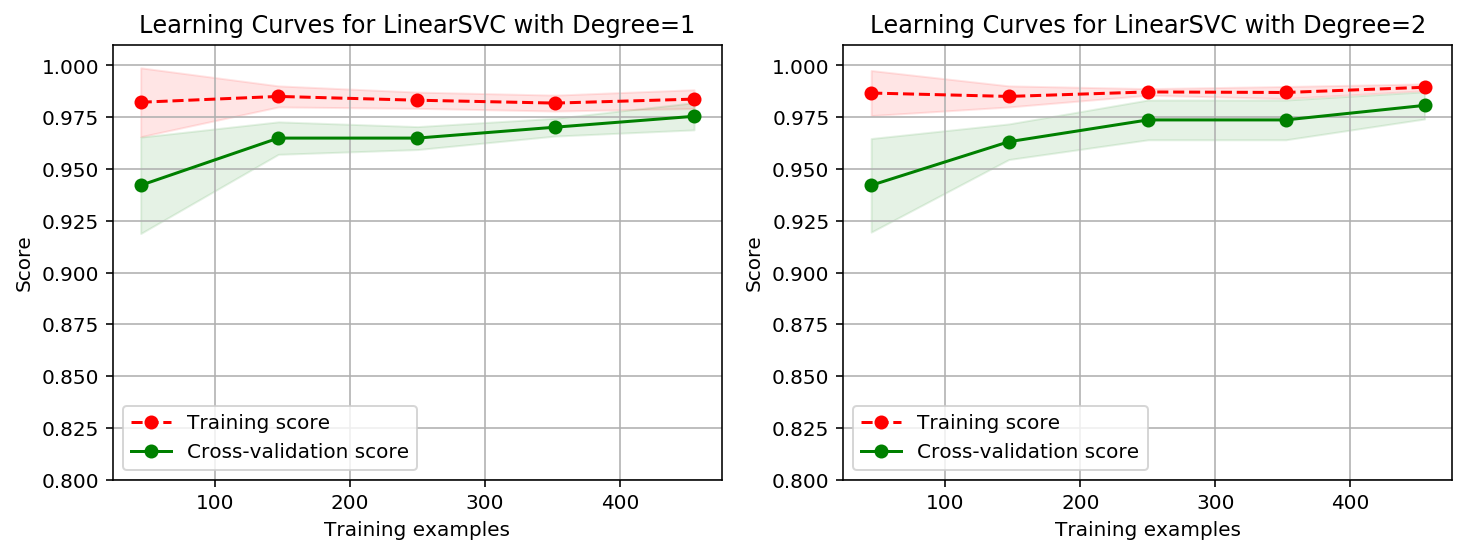

In [25]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
title = 'Learning Curves for LinearSVC with Degree={0}'
degrees = [1, 2]

plt.figure(figsize=(12, 4), dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i + 1)
    plot_learning_curve(plt, create_model(penalty='l1', dual=False, degree=degrees[i]),
                        title.format(degrees[i]), X, y, ylim=(0.8, 1.01), cv=cv)
plt.show()